In [41]:
# # https://youtu.be/0B5eIE_1vpU?si=nhzSmKH98266qmHL

In [42]:
from sklearn.datasets import fetch_california_housing

In [43]:
X, y = fetch_california_housing(return_X_y=True)

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
model = KNeighborsRegressor()

In [46]:
model.fit(X, y)

KNeighborsRegressor()

In [47]:
model.predict(X)

array([2.826802, 2.1594  , 3.650404, ..., 1.2882  , 1.4418  , 1.7342  ])

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [49]:
pipline = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors=10))])
model = LinearRegression()
pipline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=10))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=10),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 10,
 'model__p': 2,
 'model__weights': 'uniform'}

In [50]:
model.fit(X, y)
pipline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=10))])

In [51]:
p = model.predict(X)
p1 = pipline.predict(X)

In [52]:
import matplotlib.pyplot as plt

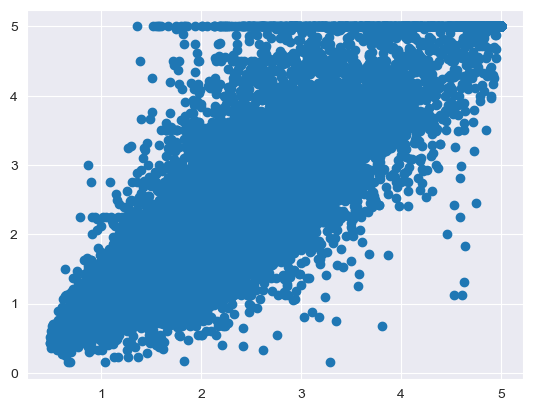

In [53]:
plt.scatter(p1, y)

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
model = GridSearchCV(estimator=pipline, param_grid={'model__n_neighbors': [1,2,3,4,5]}, cv=5)

In [56]:
model.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=10))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5]})

In [57]:
import pandas as pd
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013350,0.004180,0.190828,0.021583,1,{'model__n_neighbors': 1},0.187329,0.088762,0.388375,0.278805,0.406689,0.269992,0.120379,5
1,0.013054,0.002830,0.256231,0.070954,2,{'model__n_neighbors': 2},0.368531,0.331973,0.504760,0.413119,0.508741,0.425425,0.071214,4
2,0.014284,0.003120,0.306594,0.079569,3,{'model__n_neighbors': 3},0.435837,0.407158,0.548467,0.468958,0.537370,0.479558,0.055419,3
3,0.017251,0.002840,0.320371,0.078642,4,{'model__n_neighbors': 4},0.462808,0.451124,0.567603,0.488509,0.560549,0.506119,0.048894,2
4,0.017318,0.004992,0.367814,0.084875,5,{'model__n_neighbors': 5},0.478794,0.476008,0.576246,0.502598,0.572286,0.521186,0.044331,1


In [58]:
df = pd.read_csv('../data/drawndata1.csv')
df

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a
...,...,...,...
247,186.111898,41.435729,a
248,53.758007,1.473481,a
249,45.915907,23.502998,a
250,110.652516,12.141801,a


In [59]:
X = df[['x', 'y']].values
y = df ['z']=='a'

In [60]:
X
y

0      True
1      True
2      True
3      True
4      True
       ... 
247    True
248    True
249    True
250    True
251    True
Name: z, Length: 252, dtype: bool

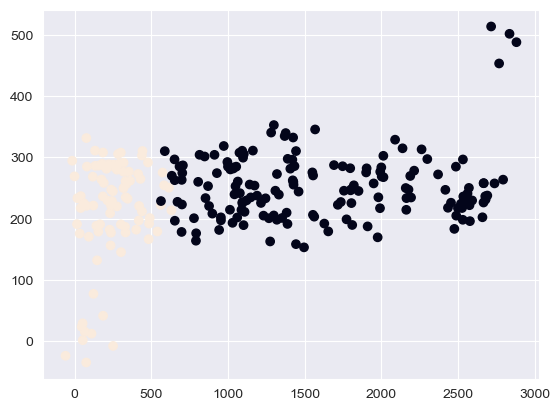

In [61]:
plt.scatter(X[:,0], X[:,1], c=y)

In [62]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [63]:
X_new = StandardScaler().fit_transform(X)

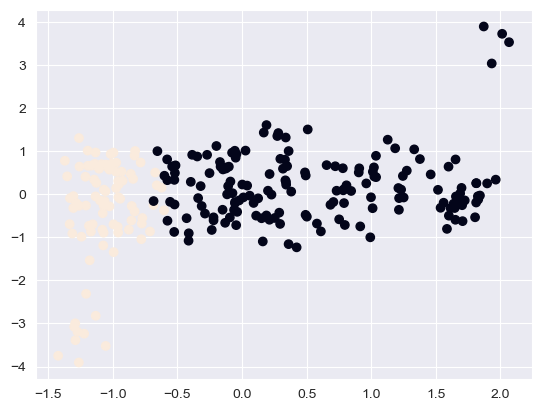

In [64]:
plt.scatter(X_new[:,0], X_new[:,1], c=y)

In [65]:
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)

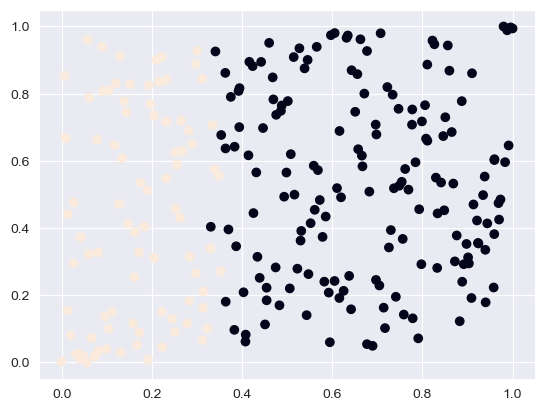

In [66]:
plt.scatter(X_new[:,0], X_new[:,1], c=y)

In [70]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)),
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

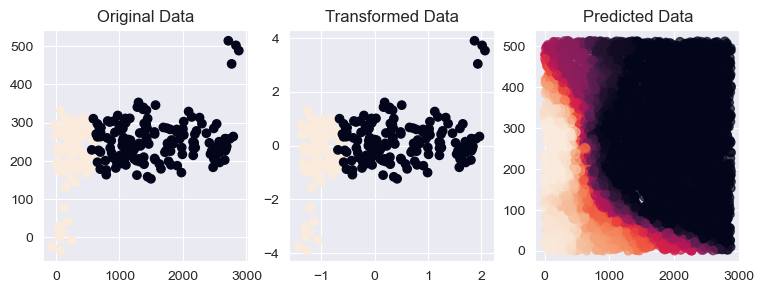

In [71]:
plot_output(scaler=StandardScaler())

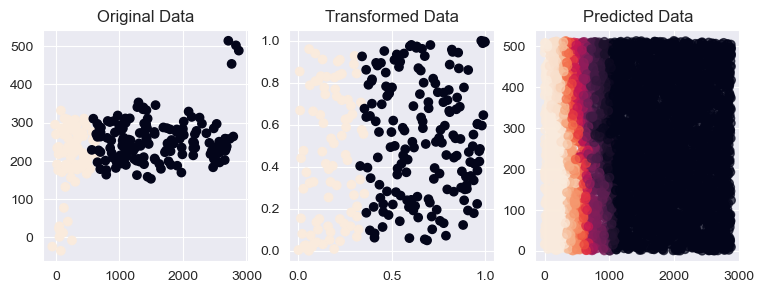

In [72]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

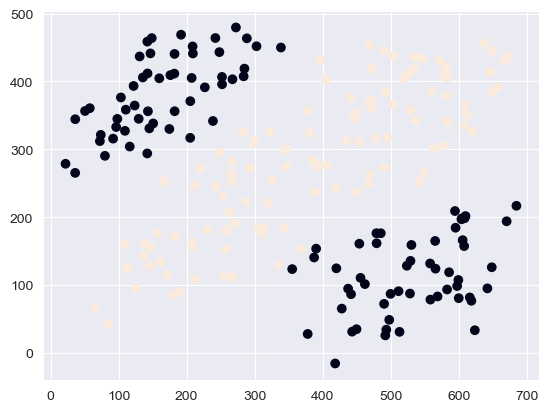

In [73]:
df = pd.read_csv("../data/drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y);

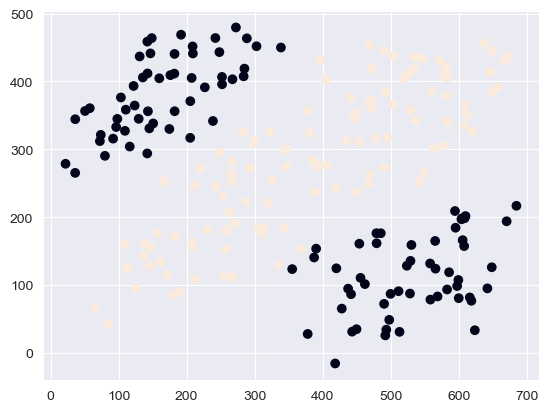

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);